In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [64]:
df = pd.read_csv('Building_Energy_Benchmarking.csv')
df.head()

/var/folders/lg/vpwp92v96rsbh9x3s5fyjd9w0000gn/T/ipykernel_4473/2371527380.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Building_Energy_Benchmarking.csv')


,X,Y,PID,SSL,PMPROPERTYID,PROPERTYNAME,PMPARENTPROPERTYID,PARENTPROPERTYNAME,REPORTINGYEAR,REPORTSTATUS,ADDRESSOFRECORD,OWNEROFRECORD,WARD,REPORTEDADDRESS,CITY,STATE,POSTALCODE,YEARBUILT,PRIMARYPROPERTYTYPE_SELFSELECT,PRIMARYPROPERTYTYPE_EPACALC,TAXRECORDFLOORAREA,REPORTEDBUILDINGGROSSFLOORAREA,ENERGYSTARSCORE,SITEEUI_KBTU_FT,WEATHERNORMALZEDSITEEUI_KBTUFT,SOURCEEUI_KBTU_FT,WEATHERNORMALZEDSOUREUI_KBTUFT,TOTGHGEMISSIONS_METRICTONSCO2E,TOTGHGEMISSINTENSITY_KGCO2EFT,WATERSCORE_MFPROPERTIES,WATERUSE_ALLWATERSOURCES_KGAL,METEREDAREAS_ENERGY,METEREDAREAS_WATER,NATURALGASUSE_THERMS,FUELOILANDDIESELFUELUSEKBTU,LATITUDE,LONGITUDE,ADDRESSID,XCOORD,YCOORD,GIS_LAST_MOD_DTTM,DISTRCHILLEDWATER_KBTU,DISTRHOTWATER_KBTU,DISTRSTEAM_KBTU,ELECTRICITYUSE_RENEWABLE_KWH,ELECTRICITYUSE_GRID_KWH,NATURALGAS_KBTU_JANUARY,NATURALGAS_KBTU_FEBRUARY,NATURALGAS_KBTU_MARCH,NATURALGAS_KBTU_APRIL,NATURALGAS_KBTU_MAY,NATURALGAS_KBTU_JUNE,NATURALGAS_KBTU_JULY,NATURALGAS_KBTU_AUGUST,NATURALGAS_KBTU_SEPTEMBER,NATURALGAS_KBTU_OCTOBER,NATURALGAS_KBTU_NOVEMBER,NATURALGAS_KBTU_DECEMBER,ELECTRICITYUSE_KBTU_JANUARY,ELECTRICITYUSE_KBTU_FEBRUARY,ELECTRICITYUSE_KBTU_MARCH,ELECTRICITYUSE_KBTU_APRIL,ELECTRICITYUSE_KBTU_MAY,ELECTRICITYUSE_KBTU_JUNE,ELECTRICITYUSE_KBTU_JULY,ELECTRICITYUSE_KBTU_AUGUST,ELECTRICITYUSE_KBTU_SEPTEMBER,ELECTRICITYUSE_KBTU_OCTOBER,ELECTRICITYUSE_KBTU_NOVEMBER,ELECTRICITYUSE_KBTU_DECEMBER,UBID,LASTUPDATE,OBJECTID
0,-8.575303e+06,4.707303e+06,DC02220020,0222 0020,NaN,NaN,NaN,NaN,2021,Exempt from this year's disclosure,727 15TH ST NW,NATIONAL COMMUNITY REINVESTMENT COALITION,2.0,NaN,WASHINGTON,DC,20005,1985.0,NaN,NaN,46332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.899610,-77.033254,218739.0,397115.369981,136862.520445,2024/10/08 01:01:27+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/09/12 04:00:00+00,3541768
1,-8.575227e+06,4.707286e+06,DC02220027,0222 0027,NaN,NaN,NaN,NaN,2021,Exempt from this year's disclosure,1425 NEW YORK AVE NW,NY AVENUE TITLEHOLDER LLC,2.0,NaN,WASHINGTON,DC,20005,1991.0,NaN,NaN,158124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.899493,-77.032576,300903.0,397174.190168,136849.566803,2024/10/08 01:01:27+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/04/14 04:00:00+00,3541769
2,-8.575234e+06,4.707311e+06,DC02220027,0222 0027,NaN,NaN,NaN,NaN,2022,Exempt from this year's disclosure,1425 NEW YORK AVENUE NW,NY AVENUE TITLEHOLDER LLC,2.0,NaN,WASHINGTON,DC,20005,1991.0,NaN,NaN,158124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.899669,-77.032635,300903.0,397169.119971,136869.030539,2024/10/08 01:01:27+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/04/14 04:00:00+00,3541770
3,-8.575281e+06,4.707161e+06,DC02230025,0223 0025,NaN,NaN,NaN,NaN,2012,No Report Received,1435 G ST NW,1440 NEW YORK AVENUE CORPORATION,2.0,NaN,WASHINGTON,DC,NaN,1934.0,NaN,NaN,228254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.898618,-77.033060,814459.0,397132.162500,136752.413602,2024/10/08 01:01:27+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541771
4,-8.575222e+06,4.707022e+06,DC02240824,0224 0824,NaN,NaN,NaN,NaN,2013,Exempt from this year's disclosure,1401 F ST NW,FSP HAMILTON SQUARE LLC,2.0,NaN,WASHINGTON,DC,20005,1999.0,NaN,NaN,269472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.897644,-77.032531,217997.0,397178.028700,136644.297802,2024/10/08 01:01:27+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/06/06 04:00:00+00,3541772


In [65]:
print(df.columns)
df = df[['X', 'Y', 'PID', 'SSL', 'PMPROPERTYID', 'PROPERTYNAME',
         'PMPARENTPROPERTYID', 'PARENTPROPERTYNAME', 'REPORTINGYEAR',
         'REPORTSTATUS', 'ADDRESSOFRECORD', 'OWNEROFRECORD', 'WARD',
         'REPORTEDADDRESS', 'CITY', 'STATE', 'POSTALCODE', 'YEARBUILT',
         'PRIMARYPROPERTYTYPE_SELFSELECT', 'PRIMARYPROPERTYTYPE_EPACALC',
         'TAXRECORDFLOORAREA', 'REPORTEDBUILDINGGROSSFLOORAREA',
         'ENERGYSTARSCORE', 'SITEEUI_KBTU_FT', 'WEATHERNORMALZEDSITEEUI_KBTUFT',
         'SOURCEEUI_KBTU_FT', 'WEATHERNORMALZEDSOUREUI_KBTUFT',
         'TOTGHGEMISSIONS_METRICTONSCO2E', 'TOTGHGEMISSINTENSITY_KGCO2EFT',
         'WATERUSE_ALLWATERSOURCES_KGAL', 'METEREDAREAS_ENERGY',  'NATURALGASUSE_THERMS',
         'FUELOILANDDIESELFUELUSEKBTU', 'LATITUDE', 'LONGITUDE', 'ADDRESSID',
         'XCOORD', 'YCOORD', 'GIS_LAST_MOD_DTTM', 'DISTRCHILLEDWATER_KBTU',
         'DISTRHOTWATER_KBTU', 'DISTRSTEAM_KBTU', 'ELECTRICITYUSE_RENEWABLE_KWH',
         'ELECTRICITYUSE_GRID_KWH', 'UBID', 'LASTUPDATE', 'OBJECTID']]

Index(['X', 'Y', 'PID', 'SSL', 'PMPROPERTYID', 'PROPERTYNAME',
       'PMPARENTPROPERTYID', 'PARENTPROPERTYNAME', 'REPORTINGYEAR',
       'REPORTSTATUS', 'ADDRESSOFRECORD', 'OWNEROFRECORD', 'WARD',
       'REPORTEDADDRESS', 'CITY', 'STATE', 'POSTALCODE', 'YEARBUILT',
       'PRIMARYPROPERTYTYPE_SELFSELECT', 'PRIMARYPROPERTYTYPE_EPACALC',
       'TAXRECORDFLOORAREA', 'REPORTEDBUILDINGGROSSFLOORAREA',
       'ENERGYSTARSCORE', 'SITEEUI_KBTU_FT', 'WEATHERNORMALZEDSITEEUI_KBTUFT',
       'SOURCEEUI_KBTU_FT', 'WEATHERNORMALZEDSOUREUI_KBTUFT',
       'TOTGHGEMISSIONS_METRICTONSCO2E', 'TOTGHGEMISSINTENSITY_KGCO2EFT',
       'WATERSCORE_MFPROPERTIES', 'WATERUSE_ALLWATERSOURCES_KGAL',
       'METEREDAREAS_ENERGY', 'METEREDAREAS_WATER', 'NATURALGASUSE_THERMS',
       'FUELOILANDDIESELFUELUSEKBTU', 'LATITUDE', 'LONGITUDE', 'ADDRESSID',
       'XCOORD', 'YCOORD', 'GIS_LAST_MOD_DTTM', 'DISTRCHILLEDWATER_KBTU',
       'DISTRHOTWATER_KBTU', 'DISTRSTEAM_KBTU', 'ELECTRICITYUSE_RENEWABLE_KWH',
       'E

In [66]:
print(df.isna().sum())

X                                     0
Y                                     0
PID                                   0
SSL                                   0
PMPROPERTYID                       4353
PROPERTYNAME                       4435
PMPARENTPROPERTYID                25640
PARENTPROPERTYNAME                25640
REPORTINGYEAR                         0
REPORTSTATUS                          0
ADDRESSOFRECORD                       4
OWNEROFRECORD                         6
WARD                                212
REPORTEDADDRESS                    4436
CITY                                105
STATE                               105
POSTALCODE                         2259
YEARBUILT                           848
PRIMARYPROPERTYTYPE_SELFSELECT     4436
PRIMARYPROPERTYTYPE_EPACALC        4533
TAXRECORDFLOORAREA                    0
REPORTEDBUILDINGGROSSFLOORAREA     4049
ENERGYSTARSCORE                    9258
SITEEUI_KBTU_FT                    4049
WEATHERNORMALZEDSITEEUI_KBTUFT     4049


In [56]:
# Could Focus On University Level Eco Labels in DC
df['PRIMARYPROPERTYTYPE_SELFSELECT'].value_counts()

PRIMARYPROPERTYTYPE_SELFSELECT
Multifamily Housing                                 8593
Office                                              6192
K-12 School                                         1717
Hotel                                               1135
College/University                                   496
Non-Refrigerated Warehouse                           333
Worship Facility                                     288
Residence Hall/Dormitory                             282
Mixed Use Property                                   262
Other - Public Services                              230
Fitness Center/Health Club/Gym                       203
Library                                              177
Fire Station                                         170
Other                                                164
Medical Office                                       157
Self-Storage Facility                                146
Other - Lodging/Residential                          132


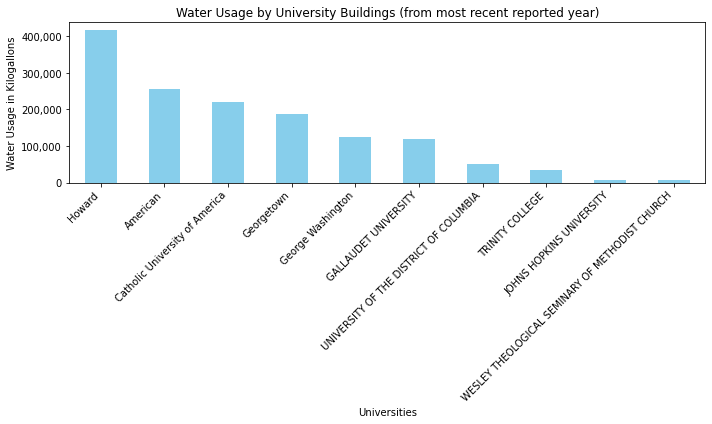

In [42]:
# Example Water Usage:
# Focus on university Buildings
df = df[df['PRIMARYPROPERTYTYPE_SELFSELECT'].isin(['College/University', 'College/University (Campus-Level)'])]

# Subset to most recent year for each address
idx = df.groupby(['ADDRESSOFRECORD'])['REPORTINGYEAR'].idxmax()
df = df.loc[idx]

df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('4300 NEBRASKA AVENUE NW', '4300 NEBRASKA AVE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('4200 CONNECTICUT AVENUE NW', '4200 CONNECTICUT AVE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('401 MICHIGAN AVENUE NE', '401 MICHIGAN AVE NE')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('3502 JOHN MCCORMACK ROAD NE', '3502 JOHN MCCORMACK RD NE')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('3015 4TH ST NE', '3015 4TH ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('2900 VAN NESS STREET NW', '2900 VAN NESS ST NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('2600 6TH STREET NW', '2600 6TH ST NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('4801 MASSACHUSETTS AV NW', '4801 MASSACHUSETTS AVE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('805 21ST ST NW', '805 21ST ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('801 NORTH CAPITOL STREET NE', '801 NORTH CAPITOL ST NE')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('800 FLORIDA AVE NE', '800 FLORIDA AV')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('550 1ST ST NW', '550 1ST ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1307 L ST NW', '1307 L ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1251 6TH ST NE', '1251 6TH ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1311 L STREET NW', '1311 L ST NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('125 MICHIGAN AVE NE', '125 MICHIGAN AV')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('111 G STREET NW', '111 G ST NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('101 F ST NW', '101 F ST')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1000 FLORIDA AVENUE NW', '1000 FLORIDA AVE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1608 RHODE ISLAND AV NW', '1608 RHODE ISLAND AVENUE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('1608 RHODE ISLAND AVE NW', '1608 RHODE ISLAND AVENUE NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('2139 GEORGIA AVE NW', '2139 GEORGIA AV NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('2125 G STREET NW', '2125 G ST NW')
df['ADDRESSOFRECORD'] = df['ADDRESSOFRECORD'].replace('2100 FOXHALL ROAD NW', '2100 FOXHALL RD NW')


idx = df.groupby(['ADDRESSOFRECORD'])['REPORTINGYEAR'].idxmax()
df = df.loc[idx]

# Clean Address names

df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('THE GEORGE WASHINGTON UNIVERSITY', 'George Washington')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('GEORGE WASHINGTON UNIVERSITY', 'George Washington')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('HOWARD UNIVERSITY (LAND ONLY)', 'Howard')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('HOWARD UNIVERSITY', 'Howard')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('THE HOWARD UNIVERSITY', 'Howard')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('THE CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('GEORGETOWN UNIVERSITY', 'Georgetown')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('GEORGETOWN COLLEGE LAW CENTER', 'Georgetown')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('AMERICAN UNIVERSITY', 'American')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('PRESIDENT & DIRECTORS OF GEORGETOWN UNIVERSITY', 'Georgetown')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('JESUIT COMMUNITY AT GEORGETOWN UNIV INC', 'Georgetown')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('THE PRESIDENT AND DIRECTORS OF GEORGETOWN COLLEGE', 'Georgetown')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('CATHOLIC UNIVERSITY OF AMERICA', 'Catholic University of America')
df['OWNEROFRECORD'] = df['OWNEROFRECORD'].replace('DISTRICT OF COLUMBIA', 'UNIVERSITY OF THE DISTRICT OF COLUMBIA')

# Remove this owner
df = df[df['OWNEROFRECORD'] != 'LELAND STANFORD TRUSTEES C/O STANFORD MANAGEMENT COMPANY']


# Plot
sums = df.groupby('OWNEROFRECORD')['WATERUSE_ALLWATERSOURCES_KGAL'].sum()
sums = sums.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
ax = sums.plot(kind='bar', color='skyblue')
plt.xlabel('Universities')

# Adjust rotation to 45 degrees to make labels diagonal and more readable
ax.set_xticklabels(sums.index, rotation=45, ha='right', size=10)

plt.ylabel('Water Usage in Kilogallons')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Water Usage by University Buildings (from most recent reported year)')

plt.tight_layout()
plt.show()